To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 4 - Logistic Regression with Regularization

## 4.1

**Answer:**
`C` parameter is the inverse of regularization strength and can take `float` values between `0` and `1`. `C` is functionally the inverse of λ, where a large `C` value corresponds to a lower weight for the penalty term while a smaller `C` increases the weight of the penalty term. A high `C` means the model will prioritize fitting the training data over penalizing large coefficients (which may overfit the data), while a low `C` value means the model will instead prioritize having smaller coefficients over fitting the training data (which may underfit the data). Finding the right `C` is a matter of balancing underfitting and overfitting the training data.
`solver` parameter is the algorithm which will be used for the optimization problem, and can take the values `lbfgs, liblinear, newton-cg newton-cholesky, sag, saga`. These algorithms are used to optimize the objective function to minimize loss. Different algorithms perform differently, and the choice depends on the problem at hand. `penalty` parameter is the choice of penalty term for the loss function and can take the values `l1, l2, elasticnet, None`. This parameter determines what penalty term is added onto the loss function for regularization purposes in order to prevent overfitting. `multi_class` parameter is the handling method for multiple label classes and can take the values `auto, ovr, multinomial`. This parameter is important for when the dependent variable has more than two classes.


## 4.2

**Answer:**
The `l1` and `l2` penalties refer to the choice of penalty term for the loss function. `l1` refers to using the L1 norm as the penalty term, commonly known as "Manhattan Distance" or "Taxicab Distance", where the sum of the absolute values of the β's times a coefficient λ is added to the loss function ($λ\sum_{i = 1}^{n}|\beta_{i}|$). `l2` refers to using the L2 norm instead, sometimes called the "Euclidean distance", where instead of sum of absolute values it is the sum of the squares of the β's times a λ coefficient ($λ\sum_{i = 1}^{n}\beta_{i}^{2}$). Lasso regression uses the L1 norm while ridge regression uses the L2 norm.

## 4.3

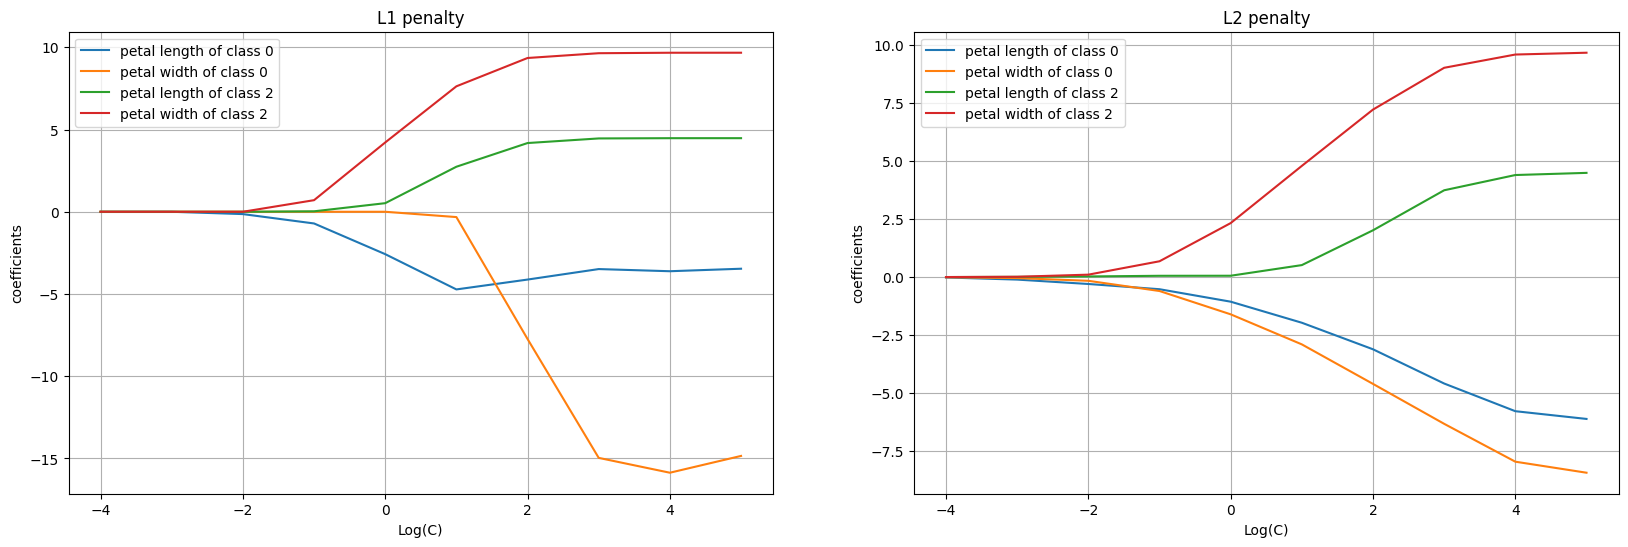

In [2]:
# your code starts here
import sklearn
from sklearn import datasets
import numpy as np

# Load the dataset
dataset = datasets.load_iris()

# Store the feature data
X = dataset.data[:, 2:]
# store the target data
y = dataset.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= True)

# print("Input variables for the dataset are:", dataset.feature_names)
# print("Target variables for the dataset are:", dataset.target_names)

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

coefs = {'l1': [], 'l2': []}
C = list(range(-4, 6))

fig, axs = plt.subplots(1, 2, figsize = (20, 6))

for i in range(len(coefs)):
  plt.sca(axs[i])
  pen = list(coefs.keys())[i]
  for c_val in C:
    logit = LogisticRegression(penalty=pen, solver='liblinear', C=(10 ** c_val), multi_class='ovr', max_iter=5000)
    logit.fit(X_train, y_train)
    coefs[pen].append(logit.coef_[[0, 2]].flatten())

  coefs[pen] = np.array(coefs[pen])

  plt.plot(C, coefs[pen][:, 0], label = 'petal length of class 0')
  plt.plot(C, coefs[pen][:, 1], label = 'petal width of class 0')
  plt.plot(C, coefs[pen][:, 2], label = 'petal length of class 2')
  plt.plot(C, coefs[pen][:, 3], label = 'petal width of class 2')

  plt.title('{} penalty'.format(pen.upper()))
  plt.xlabel("Log(C)")
  plt.ylabel('coefficients')
  plt.grid(True)
  plt.legend(loc='upper left')


**Answer:**
For the `l1` penalty, as $C$ gets smaller certain feature coefficients go to zero, effectively removing them from the model. Meanwhile for the `l2` penalty, as $C$ decreases the coefficients approach zero but can't quite hit zero. This is typical of L1 and L2 regularization; a characteristic of LASSO regression is that it will exclude less important features while ridge will not.

## 4.4

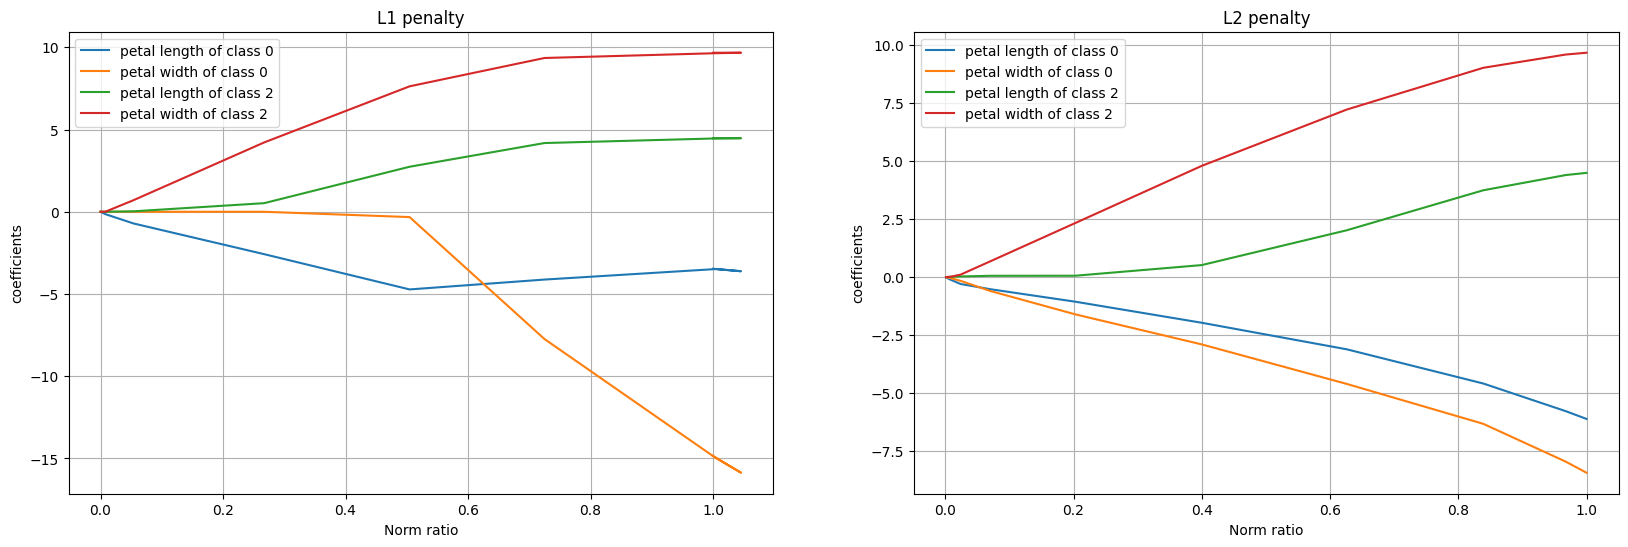

In [3]:
# your code starts here
fig, axs = plt.subplots(1, 2, figsize = (20, 6))

def l2norm(arr):
  return (sum([i ** 2 for i in arr])) ** 0.5

for i in range(len(coefs)):
  plt.sca(axs[i])
  pen = list(coefs.keys())[i]

  ratios = [l2norm(betas) / l2norm(coefs[pen][-1]) for betas in coefs[pen]]

  plt.plot(ratios, coefs[pen][:, 0], label = 'petal length of class 0')
  plt.plot(ratios, coefs[pen][:, 1], label = 'petal width of class 0')
  plt.plot(ratios, coefs[pen][:, 2], label = 'petal length of class 2')
  plt.plot(ratios, coefs[pen][:, 3], label = 'petal width of class 2')

  plt.title('{} penalty'.format(pen.upper()))
  plt.xlabel("Norm ratio")
  plt.ylabel('coefficients')
  plt.grid(True)
  plt.legend(loc='upper left')

**Answer:**
As the ratio increases, the magnitudes of the coefficients also increase. Similarly to the plots with $C$, for the `l1` penalty some of the coefficients are 0 unlike `l1`. The `l1` lines have dramatic jumps while the `l2` lines are smoother. Interestingly enough the `l1` plots are not monotone decreasing/increasing while in the